# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Nabila Anggita Luna]
- **Email:** [m296b4kx3180@bangkit.academy]
- **ID Dicoding:** [Nabila_anggita_luna]

## Menentukan Pertanyaan Bisnis

pertanyaan 1: seberapa berpengaruh musim terhadap penyewa sepeda

Pertanyaan 2:
 pada saat kapan penyewa sepeda banyak peminatnya setiap harinya

## Import Semua Packages/Library yang Digunakan

In [178]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar


**Insight:**
- Disini saya mengimport beberapa library yang akan saya gunakan


## Data Wrangling

membaca data yang telah saya simpan di drive

In [179]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


file saya simpan di drive dan sudah saya buka aksesnya

In [180]:
pip install pandas

### Gathering Data

In [181]:
df = pd.read_csv('/content/drive/MyDrive/Bangkit/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca melihat data yang telah disediakan


### Assessing Data

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Melihat tipe data


In [183]:
# Check for missing values
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [184]:
#check duplicate data
df.duplicated().sum()

0

**Insight:**
- check missing value dan duplicate data
- sudah tidak terdapat missing value maupun diplicate data


In [185]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [186]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [187]:
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


**Insight:**
- melihat kembali data


**Insight:**
- tidak ada missing value pada data
- tidak ada duplikasi data pada semua data
- data sudah siap untuk digunakan




### Cleaning Data

In [188]:
#merubah musim dari angka integer menjadi kata string
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)

df['season'] = season_list


In [189]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [190]:
#menemukan dtaa weekday yang sesuai
df['dteday'] = pd.to_datetime(df['dteday'])

In [191]:
#mengubah wekkday menjadi data yang sesuai
df['weekday'] = df['dteday'].dt.day_name()

In [192]:
#mengganti bulan angka(integer) menjadi huruf nama bulannya (string)

df['mnth'] = df['dteday'].dt.month_name()


In [193]:
#mengubah yr menjadi tahun yang sesuai dengan dat dteday nya
df['yr'] = df['dteday'].dt.year

In [194]:
#melihat data setelah diubah sesuai ketentuan
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [195]:
#melihat tipe data yang telah diubah

df.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


In [196]:
#menyimpan dataset yang sudah diolah kedalam file baru
df.to_csv('data_siap.csv', index=False)

**Insight:**
- pada tahap ini saya merubah beberapa tipe data yang masih berupa angka saya menginginkan data nya berubah menjadi data huruf yang sesuai dengan namanya
- data yang sudah dirubah disimpan kembali bernama (data_siap.csv)




## Exploratory Data Analysis (EDA)

### Explore ...

In [197]:
df.dtypes


,0
instant,int64
dteday,datetime64[ns]
season,object
yr,int32
mnth,object
hr,int64
holiday,int64
weekday,object
workingday,int64
weathersit,int64


**Insight:**
- melihat jumlah pelanggan yang menyewa pada saat beberapa jenis cuaca
-

In [198]:
df.groupby(by="weekday").agg({
    "weekday": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

weekday  cnt                            
          nunique  max min        mean         std
weekday                                           
Friday          1  957   1  196.135907  174.076894
Monday          1  968   1  183.744655  179.514167
Saturday        1  783   1  190.209793  179.820569
Sunday          1  776   1  177.468825  168.167710
Thursday        1  976   1  196.436665  188.011923
Tuesday         1  970   1  191.238891  187.820480
Wednesday       1  977   1  191.130505  190.894464

<ipython-input-199-2d021fd6a534>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-199-2d021fd6a534>:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped

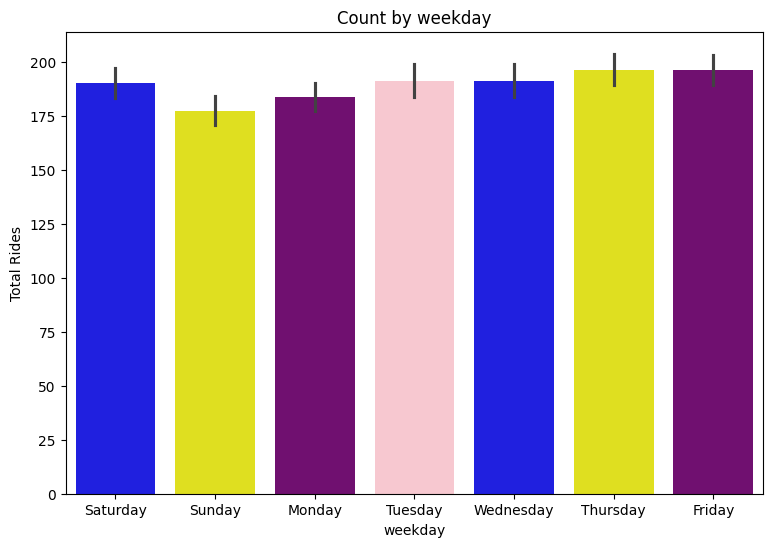

In [199]:
# tampilkan histogram tiap berdasarkan perharinya
plt.figure(figsize=(9,6))
sns.barplot(
    x="weekday",
    y="cnt",
    data=df,
    palette=["blue", "yellow", "purple", "pink", ]
)

plt.xlabel("weekday")
plt.ylabel("Total Rides")
plt.title("Count by weekday")
plt.show()

In [200]:
#menampilkan data urut terbanyak berdasarkan weekday
df.groupby(by="weekday").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,,,
Wednesday,2475,104,4,2,12,24,2,2,4,47,57,75,21,132,572,616
Saturday,2512,105,4,2,12,24,1,1,4,49,59,83,25,298,406,609
Thursday,2471,104,4,2,12,24,2,2,3,43,57,76,24,127,567,606
Tuesday,2453,104,4,2,12,24,2,2,3,43,52,77,25,121,567,598
Monday,2479,105,4,2,12,24,2,2,4,45,54,77,25,161,533,595
Friday,2487,104,4,2,12,24,2,2,3,47,61,77,24,160,528,584
Sunday,2502,105,4,2,12,24,1,1,3,48,58,75,26,271,401,571


In [201]:
#menampilkan data urut terbanyak berdasarkan year
df.groupby(by="yr").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,,,,,,,,,,,,,,,,
2012,8734,366,4,12,24,2,7,2,4,50,61,81,26,319,772,866
2011,8645,365,4,12,24,2,7,2,4,48,65,88,29,229,514,585


In [202]:
#menampilkan data urut terbanyak berdasarkan workingday
df.groupby(by="workingday").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
workingday,,,,,,,,,,,,,,,,
1,11865,500,4,2,12,24,1,5,4,49,64,85,28,172,775,856
0,5514,231,4,2,12,24,2,7,4,49,61,83,28,322,444,676


In [203]:
#menampilkan data urut terbanyak berdasarkan  holiday
df.groupby(by="holiday").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
holiday,,,,,,,,,,,,,,,,
0,16879,710,4,2,12,24,7,2,4,50,65,89,30,322,776,869
1,500,21,4,2,9,24,5,1,3,42,48,64,20,141,229,276


In [204]:
#mengekstrak 4 data berdasarkan musim [temp,atemp, hum, windsped]
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098
std,0.192556,0.171850,0.192930,0.122340
min,0.020000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500
50%,0.500000,0.484800,0.630000,0.194000
75%,0.660000,0.621200,0.780000,0.253700
max,1.000000,1.000000,1.000000,0.850700


In [205]:
df.groupby(by="weathersit").agg({
    "cnt": "nunique",
    "weathersit": ["max", "min", "mean", "std"]
})

cnt weathersit              
           nunique        max min mean  std
weathersit                                 
1              848          1   1  1.0  0.0
2              649          2   2  2.0  0.0
3              368          3   3  3.0  0.0
4                3          4   4  4.0  0.0

<ipython-input-206-a1541cf6a206>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


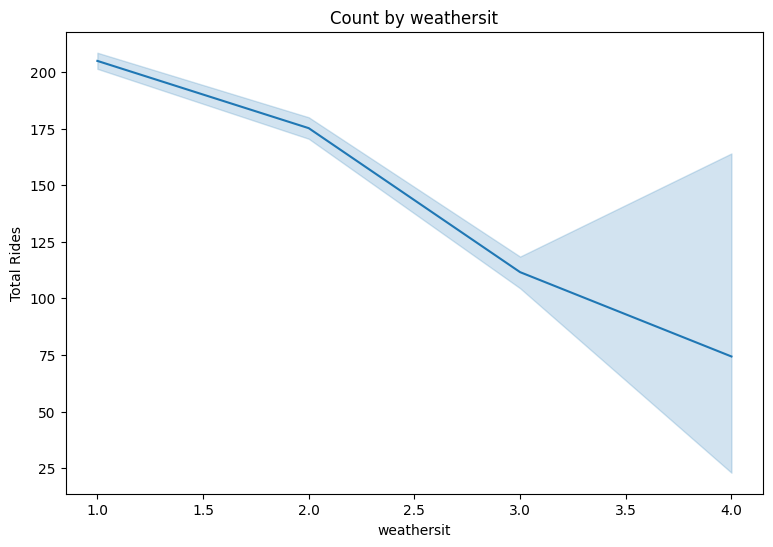

In [206]:
# tampilkan histogram tiap berdasarkan weathersit
plt.figure(figsize=(9,6))
sns.lineplot(
    x="weathersit",
    y="cnt",
    data=df,
    palette=["blue", "yellow", "purple", "pink", ]
)

plt.xlabel("weathersit")
plt.ylabel("Total Rides")
plt.title("Count by weathersit")
plt.show()

In [207]:
#menampilkan data urut terbanyak berdasarkan weathersit
df.groupby(by="weathersit").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
weathersit,,,,,,,,,,,,,,,,
1,11413,700,4,2,12,24,2,7,2,50,65,84,28,315,744,848
2,4544,567,4,2,12,24,2,7,2,47,59,78,25,219,579,649
3,1419,300,4,2,12,24,2,7,2,40,49,57,25,121,327,368
4,3,3,1,2,1,3,1,3,2,3,3,2,3,2,3,3


In [208]:
#menampilkan data urut terbanyak berdasarkan temp
df.groupby(by="temp").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,registered,cnt
temp,,,,,,,,,,,,,,,,
0.70,690,240,4,2,8,24,2,7,2,3,4,25,21,160,363,408
0.64,692,235,4,2,10,24,2,7,2,3,6,25,22,162,347,386
0.66,693,250,4,2,9,24,2,7,2,3,5,24,19,158,347,386
0.62,726,239,4,2,10,24,2,7,2,3,8,32,22,149,349,385
0.72,570,218,4,2,8,24,2,7,2,3,7,29,18,178,334,378
0.60,675,230,4,2,11,24,2,7,2,3,8,29,20,154,343,373
0.74,516,201,3,2,7,24,2,7,2,3,7,27,20,186,322,346
0.56,579,210,4,2,10,24,2,7,2,3,1,30,22,139,311,343
0.52,556,203,4,2,11,24,2,7,2,3,1,37,19,133,299,333


In [209]:
#menampilkan data urut terbanyak berdasarkan windspeed
df.groupby(by="windspeed").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
windspeed,,,,,,,,,,,,,,,,
0.1642,1695,610,4,2,12,24,2,7,2,3,49,54,77,191,478,550
0.2239,1513,584,4,2,12,24,2,7,2,3,45,52,74,202,473,540
0.1940,1657,607,4,2,12,24,2,7,2,4,48,51,74,187,460,537
0.0000,2180,521,4,2,12,24,2,7,2,3,48,54,76,187,462,534
0.1343,1738,606,4,2,12,24,2,7,2,3,48,48,75,175,437,520
0.2537,1295,529,4,2,12,24,2,7,2,3,46,51,74,198,437,506
0.1045,1617,562,4,2,12,24,2,7,2,3,44,50,74,163,433,490
0.2836,1048,477,4,2,12,24,2,7,2,3,46,50,75,192,403,472
0.0896,1425,515,4,2,12,24,2,7,2,4,44,49,72,159,384,448


In [210]:
#menampilkan data urut terbanyak berdasarkan hum
df.groupby(by="hum").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,cnt
hum,,,,,,,,,,,,,,,,
0.83,630,196,4,2,9,24,2,7,2,3,11,11,19,92,277,300
0.88,657,188,4,2,12,24,2,7,2,3,12,11,21,77,255,270
0.55,352,189,4,2,12,24,2,7,2,3,17,21,19,133,232,264
0.70,430,190,4,2,12,24,2,7,2,3,11,17,18,103,221,263
0.66,388,190,4,2,12,24,2,7,2,3,12,15,17,118,245,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.13,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


## Visualization & Explanatory Analysis

### Pertanyaan 1:

**pertanyaan:**
- seberapa berpengaruh musim terhadap penyewa sepeda?




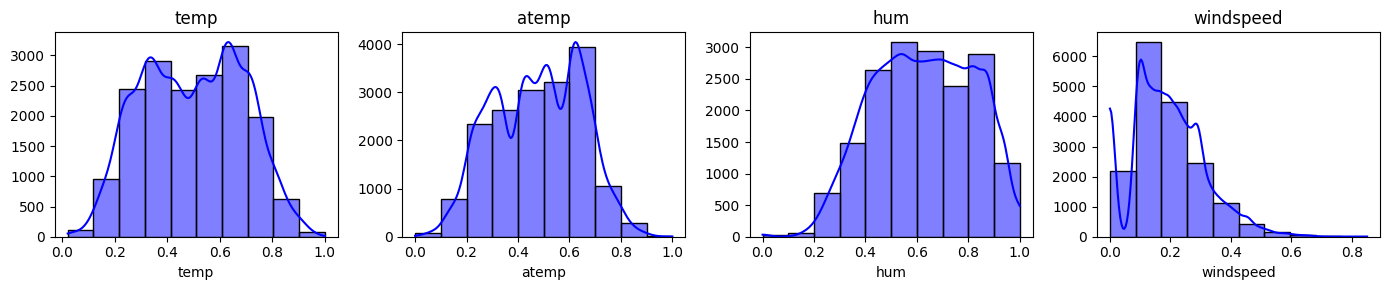

In [211]:
#menampilkan bagan untuk data berdasarkan musim
fig, axs = plt.subplots(1, 4, figsize=(14, 3))
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')

    ax.set_title(float_vars[i])
    ax.set_ylabel("")
plt.tight_layout()
plt.show()


<ipython-input-212-0f97ccb0e392>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead o

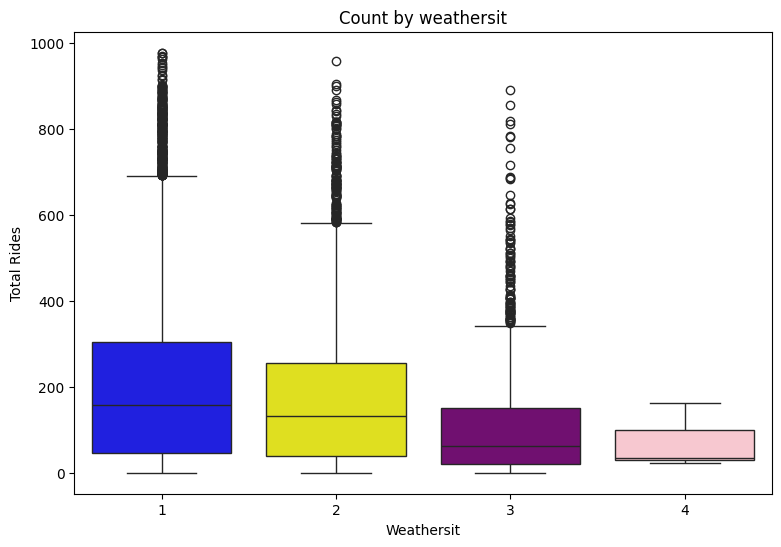

In [212]:
# tampilkan histogram tiap berdasarkan weathersit
plt.figure(figsize=(9,6))
sns.boxplot(
    x="weathersit",
    y="cnt",
    data=df,
    palette=["blue", "yellow", "purple", "pink", ]
)

plt.xlabel("Weathersit")
plt.ylabel("Total Rides")
plt.title("Count by weathersit")
plt.show()

**Insight:**
- disini saya memvisualisasi datanya dalam bentuk histogram

### Pertanyaan 2:

**pertanyaan:**
-  pada saat kapan penyewa sepeda banyak peminatnya berdasarkkan hari?

<ipython-input-213-7bc597232632>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-213-7bc597232632>:3: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seabor

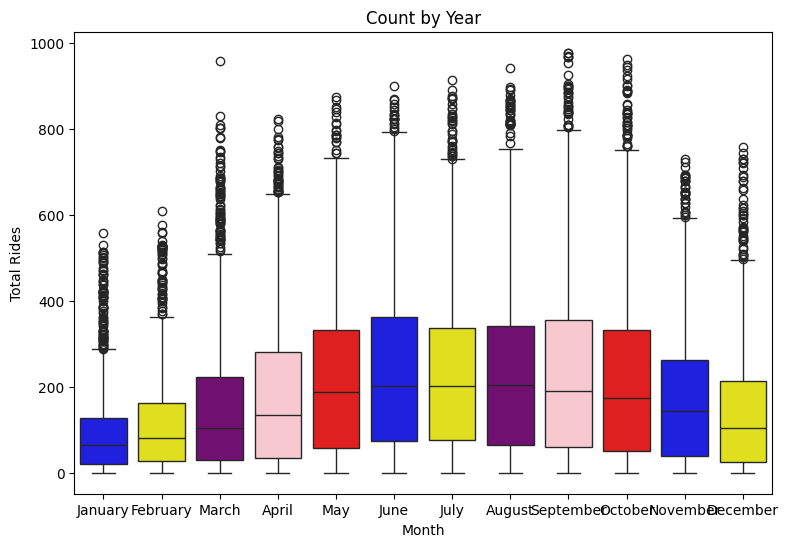

In [213]:
# tampilkan histogram tiap bulannya
plt.figure(figsize=(9,6))
sns.boxplot(
    x="mnth",
    y="cnt",
    data=df,
    palette=["blue", "yellow", "purple", "pink", "red"]
)

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Count by Year")
plt.show()

<ipython-input-216-7361c0da0f3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-216-7361c0da0f3d>:3: UserWarning: 
The palette list has fewer values (5) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seabor

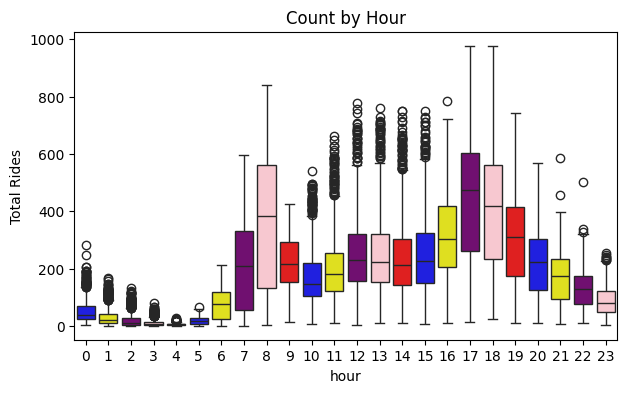

In [216]:
# tampilkan histogram tiap jamnya
plt.figure(figsize=(7,4))
sns.boxplot(
    x="hr",
    y="cnt",
    data=df,
    palette=["blue", "yellow", "purple", "pink", "red"]
)

plt.xlabel("hour")
plt.ylabel("Total Rides")
plt.title("Count by Hour")
plt.show()

<ipython-input-220-957bff64a7de>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


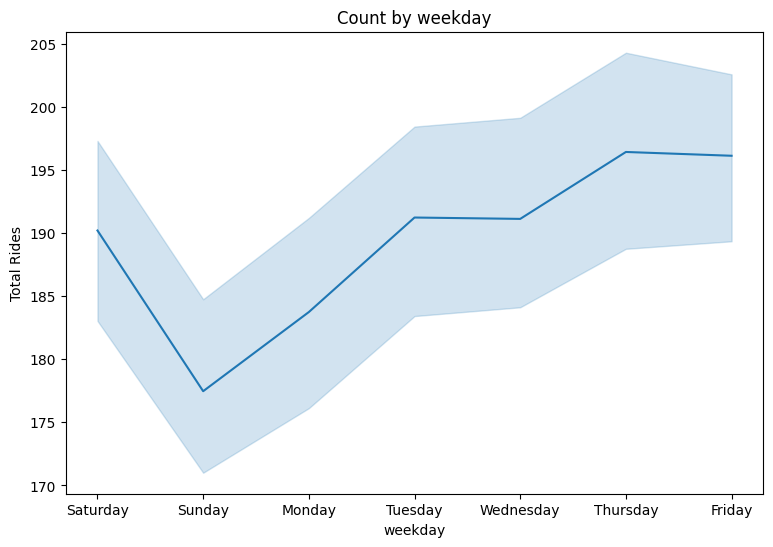

In [220]:
# tampilkan histogram tiap minggunya
plt.figure(figsize=(9,6))
sns.lineplot(
    x="weekday",
    y="cnt",
    data=df,
    palette=["navy","aqua", "yellow", "orange", "pink","magenta"]
)

plt.xlabel("weekday")
plt.ylabel("Total Rides")
plt.title("Count by weekday")
plt.show()

In [218]:
weekday_users_df = df.groupby("weekday").agg({
    "cnt": "sum"
})

weekday_users_df

,cnt
weekday,
Friday,487790
Monday,455503
Saturday,477807
Sunday,444027
Thursday,485395
Tuesday,469109
Wednesday,473048


In [219]:
#mengurutkan terbanyak perharinya
weekday_users_df.sort_values(by="cnt", ascending=False)

,cnt
weekday,
Friday,487790
Thursday,485395
Saturday,477807
Wednesday,473048
Tuesday,469109
Monday,455503
Sunday,444027


In [221]:
#melihat workingday atau tidak banyak mana
df.groupby(by="workingday").nunique().sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
workingday,,,,,,,,,,,,,,,,
1,11865,500,4,2,12,24,1,5,4,49,64,85,28,172,775,856
0,5514,231,4,2,12,24,2,7,4,49,61,83,28,322,444,676


**Insight:**
- memvisualisasi data berdasarkan hari
- ternyata pada saat hari kerja banyak peminatnya
- hari jum'at menjadi hari yang paling banyak peminatnya
- pada pukul 8 dan 17 merupakan puncak tertinggi sewa
- Pergi bekerja/sekolah: Pukul 8 pagi adalah waktu yang umum bagi orang-orang untuk berangkat bekerja atau sekolah.
Pulang bekerja/sekolah: Pukul 5 sore adalah waktu yang umum bagi orang-orang untuk menyelesaikan aktivitas mereka dan pulang ke rumah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Ketika cuaca sangat buruk, hanya ada sedikit peminat penyewaan sepeda. Ini mungkin karena mereka tidak ingin mengambil risiko terjadi sesuatu yang buruk. Saran saya adalah tidak apa-apa bahwa penurunan permintaan selama cuaca buruk adalah hal yang wajar. Menggunakan sepeda saat cuaca buruk dapat meningkatkan risiko kecelakaan atau kerusakan pada sepeda.

- Conclusion pertanyaan 2 : peminat sewa terbanyak jatuh kepada hari sabtu. hal ini mungkin terjadi dikarenakan Pergi bekerja/sekolah: Pukul 8 pagi adalah waktu yang umum bagi orang-orang untuk berangkat bekerja atau sekolah.
Pulang bekerja/sekolah: Pukul 5 sore adalah waktu yang umum bagi orang-orang untuk menyelesaikan aktivitas mereka dan pulang ke rumah.